# Generate our second-order antiderivative matrix

In [9]:
def inverse_D2(dimension):
    """Multiply to our array of second derivative outputs and multiply h^2 to get our original function f(x).
    
    We know D2 is an nxn matrix whose diagonals are -2 and adjacent values are 1. We calculate the derivative via
    (D2)(y)/(h^2) = y'', so our antiderivative is y = (y'')(h^2)(D2^{-1}), meaning we need the inverse of D2."""
    import numpy as np
    
    # Generate a zero-matrix as our starting point
    matrix = np.zeros((dimension , dimension))
    
    
    
    
    # Run a loop to go through every value in the matrix
    for row in range(dimension):
        for column in range(dimension):
        
            # If the row and column have the same values, then we are at a diagonal
            if row - column == 0:
                matrix[row][column] = -2
        
            # If their difference is 1, then we are at a value touching the diagonal.
            elif abs(row - column) == 1:
                matrix[row][column] = 1
    
    
    
    
    # Return the inverse of the generated matrix
    return np.linalg.inv(matrix)

# Approximate the solution to a second-order DE
# We start with f''(x)=2, f(0)=0, & f'(0)=2.

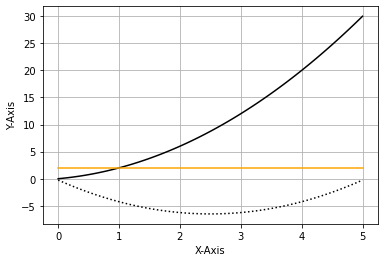

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define our initial function and our exact end goal function for comparison purposes
def func2(x):
    """Inputs an array of x-values and outputs an array of the second order derivative y-values."""
    num_vals = x.size
    return np.ones(num_vals) * 2

def exact_func(x):
    """Inputs an array of x-values and outputs an array of the exact y-values of the original function."""
    return x ** 2 + x




# Define our input x-values and other important variables
# Setting our min and max x-values
x_min = 0
x_max = 5

# Create our array of inputs by dividing it into n distinct subintervals
num_interv = 100
x_val = np.linspace(x_min, x_max, num_interv+1)

# Define our subinterval width
interv_width = (x_max-x_min) / num_interv




# Defining and plotting our exact outputs
exac_y_val = exact_func(x_val)
plt.plot(x_val, exac_y_val, color="black")

deriv2_val = func2(x_val)
plt.plot(x_val, deriv2_val, color="orange")




# Creating our antiderivative matrix and multiply it to our modified array of second derivative outputs
antid_matrix = inverse_D2(num_interv+1)
step1 = deriv2_val * (interv_width ** 2)
y_val = np.matmul(antid_matrix, step1)
plt.plot(x_val, y_val, color="black", linestyle="dotted")



# Set up our cosmetic expectations for our plot and display the graph
plt.grid()
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.show()